In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 10.8MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219265 sha256=2023b102115593a57514a71bd097ebab8932cead229c344cff7b9133662a0212
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(4)
print('The data used will be:')
df_train[['Human','Yersinia']]

The data used will be:


,Human,Yersinia
0,"[MKDK, KDKQ, DKQK, KQKK, QKKK, KKKK, KKKE, KKE...","[MAKA, AKAS, KASR, ASRH, SRHN, RHNL, HNLS, NLS..."
1,"[MSWS, SWSG, WSGL, SGLL, GLLH, LLHG, LHGL, HGL...","[MQHV, QHVT, HVTG, VTGS, TGSK, GSKR, SKRR, KRR..."
2,"[MSLF, SLFD, LFDL, FDLF, DLFR, LFRG, FRGF, RGF...","[MAEL, AELP, ELPA, LPAK, PAKR, AKRR, KRRF, RRF..."
3,"[MAVA, AVAP, VAPR, APRL, PRLF, RLFG, LFGG, FGG...","[MRIF, RIFA, IFAI, FAIS, AISC, ISCS, SCSS, CSS..."
4,"[MSTI, STIQ, TIQS, IQSE, QSET, SETD, ETDC, TDC...","[MSYA, SYAF, YAFP, AFPG, FPGT, PGTF, GTFP, TFP..."
...,...,...
6265,"[MSYF, SYFG, YFGE, FGEH, GEHF, EHFW, HFWG, FWG...","[MITT, ITTD, TTDG, TDGN, DGNS, GNSA, NSAV, SAV..."
6266,"[MTVG, TVGK, VGKS, GKSS, KSSK, SSKM, SKML, KML...","[MSQP, SQPP, QPPF, PPFW, PFWQ, FWQQ, WQQK, QQK..."
6267,"[MNNL, NNLS, NLSF, LSFS, SFSE, FSEL, SELC, ELC...","[MSED, SEDR, EDRH, DRHQ, RHQQ, HQQR, QQRQ, QRQ..."
6268,"[MAPE, APEI, PEIN, EINL, INLP, NLPG, LPGP, PGP...","[MKNL, KNLS, NLSF, LSFV, SFVA, FVAG, VAGL, AGL..."


Median length of Human sequence is 476


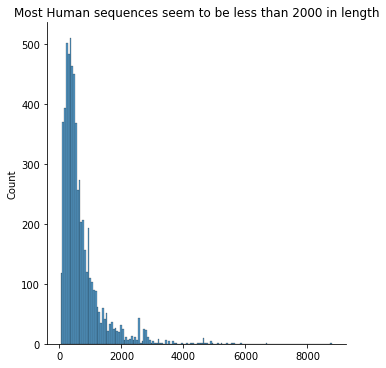

In [3]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 333


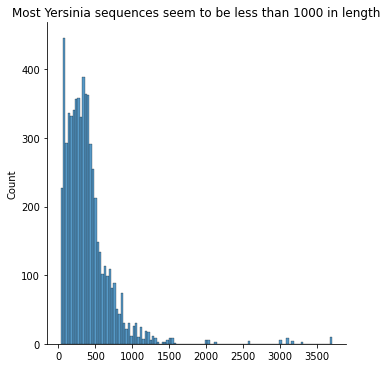

In [4]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

In [5]:
data1_4D_doubleip,data2_4D_doubleip,data1_test_4D_doubleip,data2_test_4D_doubleip,num_words_4D,MAX_SEQUENCE_LENGTH_4D,MAX_VOCAB_SIZE_4D = f.get_seq_data_doubleip(50000,2000,df_train,df_test)

MAX_VOCAB_SIZE is 50000
MAX_SEQUENCE_LENGTH is 2000
max sequences1_train length: 6264
min sequences1_train length: 21
median sequences1_train length: 328
max word index sequences1_train: 49999
max sequences2_train length: 3565
min sequences2_train length: 15
median sequences2_train length: 246
max word index sequences2_train: 49999
Found 155225 unique tokens in tokenizer1.
Found 134906 unique tokens in tokenizer2.
Shape of data1 tensor: (6270, 2000)
Shape of data2 tensor: (6270, 2000)
max test_sequences1 length: 4337
min test_sequences1 length: 22
median test_sequences1 length: 332
max test_sequences2 length: 3565
min test_sequences2 length: 15
median test_sequences2 length: 235
Shape of test_data1 tensor: (1514, 2000)
Shape of test_data2 tensor: (1514, 2000)
num_words is 50000


In [8]:
embedding_layer1_4D = f.embedding_layer(num_words_4D,MAX_SEQUENCE_LENGTH_4D,EMBEDDING_DIM = 20)
embedding_layer2_4D = f.embedding_layer(num_words_4D,MAX_SEQUENCE_LENGTH_4D,EMBEDDING_DIM = 20)
BATCH_SIZE = 128
EPOCHS = 20
M_4D=50
DROPOUT = 0.3

In [9]:
inputA = Input(shape=(MAX_SEQUENCE_LENGTH_4D,),name="Human_4D_doubleip")
x1 = embedding_layer1_4D(inputA)
x1 = Bidirectional(LSTM(M_4D, return_sequences=True),name="Human_Bidirectional_4D_doubleip")(x1)
x1 = Dropout(DROPOUT)(x1)
x1 = Dense(128, activation='relu')(x1)
#x1 = Dropout(0.2)(x1)
x1 = GlobalMaxPool1D()(x1)
x1_4D_doubleip = Model(inputs=inputA, outputs=x1)

inputB = Input(shape=(MAX_SEQUENCE_LENGTH_4D,),name="Yersinia_4D_doubleip")
x2 = embedding_layer2_4D(inputB)
x2 = Bidirectional(LSTM(M_4D, return_sequences=True),name="Yersinia_Bidirectional_4D_doubleip")(x2)
x2 = Dropout(DROPOUT)(x2)
x2 = Dense(128, activation='relu')(x2)
#x2 = Dropout(0.2)(x2)
x2 = GlobalMaxPool1D()(x2)
x2_4D_doubleip = Model(inputs=inputB, outputs=x2)

concatenator = Concatenate(axis=1)
x = concatenator([x1_4D_doubleip.output, x2_4D_doubleip.output]) 
x = Dense(128, activation='relu')(x)
x = Dropout(DROPOUT)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)

model4D_doubleip = Model(inputs=[x1_4D_doubleip.input, x2_4D_doubleip.input], outputs=output)


model4D_doubleip.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)


#model.summary()

print('Training model...')
jk = model4D_doubleip.fit(
  [data1_4D_doubleip,data2_4D_doubleip],
  df_train['label'].values,
  batch_size=128,
  epochs=EPOCHS,
  #validation_split=VALIDATION_SPLIT,
  verbose=1
)

#print(roc_auc_score(df_train['label'].values, model.predict([da,data2])))

Training model...
Epoch 1/20
49/49 [==============================] - 25s 398ms/step - loss: 0.9290 - accuracy: 0.5172
Epoch 2/20
49/49 [==============================] - 20s 405ms/step - loss: 0.4656 - accuracy: 0.7932
Epoch 3/20
49/49 [==============================] - 20s 403ms/step - loss: 0.2206 - accuracy: 0.9195
Epoch 4/20
49/49 [==============================] - 20s 401ms/step - loss: 0.1069 - accuracy: 0.9657
Epoch 5/20
49/49 [==============================] - 20s 401ms/step - loss: 0.0534 - accuracy: 0.9838
Epoch 6/20
49/49 [==============================] - 20s 402ms/step - loss: 0.0438 - accuracy: 0.9850
Epoch 7/20
49/49 [==============================] - 20s 399ms/step - loss: 0.0326 - accuracy: 0.9923
Epoch 8/20
49/49 [==============================] - 20s 402ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 9/20
49/49 [==============================] - 20s 405ms/step - loss: 0.0154 - accuracy: 0.9955
Epoch 10/20
49/49 [==============================] - 20s 398ms/step - los

In [10]:
yhat =  model4D_doubleip.predict([data1_test_4D_doubleip,data2_test_4D_doubleip])
y = df_test['label'].values
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y, yhat)
auc = metrics.auc(fpr, tpr)
auc

0.8913932316433673

In [11]:
#model4D_doubleip.save('/content/drive/MyDrive/ML_Data/model4D_doubleip.h5')